<a href="https://colab.research.google.com/github/rgaguiar/recuperacao_endereco/blob/main/GeoStreetMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Geografica: Presença de Clínicas no Bairro Prefeito José Walter, Fortaleza, CE"

In [1]:
# OpenStreetMap

In [37]:
# !pip install osmnx
!pip install matplotlib-scalebar

In [38]:
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

Obtendo o mapa com as ruas e conexões

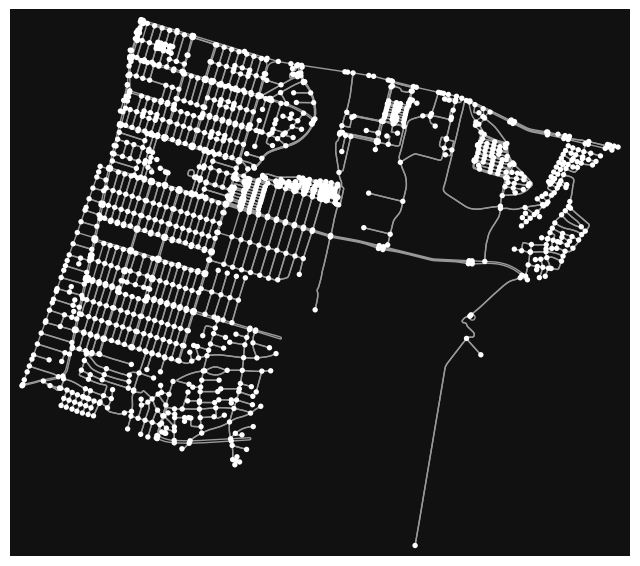

In [5]:
place_name = "Prefeito José Walter, Ceará, Brazil"
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)

Obtendo a camada da área do bairro

In [6]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [7]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

<Axes: >

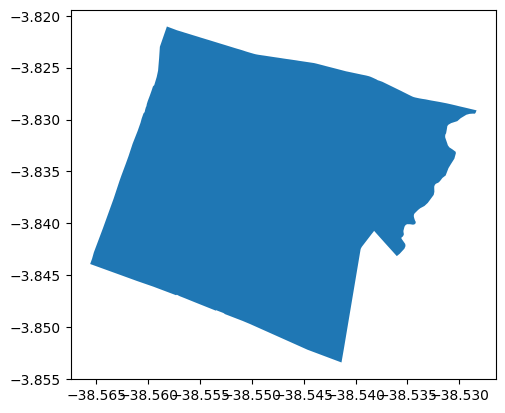

In [8]:
# Plot the area:
area.plot()

Obtendo elementos do bairro: construções (prédios e casas), clinicas (objeto de estudo) e presença de parques e brinquedos no bairro

In [10]:
# List key-value pairs for tags
tags = {"building": True}
buildings = ox.features_from_place(place_name, tags)

In [11]:
#place = "Fortaleza, Ceará, Brasil"  # Local desejado 1.3.5	Healthcare
tags = {"amenity": "clinic"}  # Tag de interesse
clinic = ox.features_from_place(place_name, tags)

In [17]:
# List key-value pairs for tags
tags = {"leisure": "park", "landuse": "grass"}
# Get the data
parks = ox.features_from_place(place_name, tags)

<Axes: >

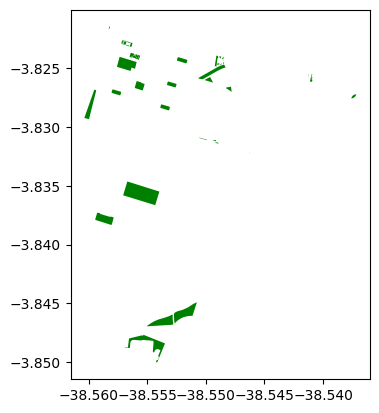

In [18]:
parks.plot(color="green")

Obtendo o dataframe das informações das clinicas presentes no mapa

In [13]:
clinic

geometry  \
element id                                                               
node    4466698131                          POINT (-38.55909 -3.82697)   
        4466698133                          POINT (-38.55954 -3.82896)   
        4481767516                          POINT (-38.55984 -3.83005)   
        5135421548                          POINT (-38.55496 -3.82842)   
        11945220529                         POINT (-38.54764 -3.82667)   
way     970194468    POLYGON ((-38.55652 -3.83078, -38.55666 -3.831...   
        970742723    POLYGON ((-38.5612 -3.83593, -38.56118 -3.8359...   
        1313190336   POLYGON ((-38.55143 -3.83754, -38.55153 -3.837...   

                     addr:city addr:housenumber                  addr:street  \
element id                                                                     
node    4466698131   Fortaleza              591  Avenida João de Araujo Lima   
        4466698133   Fortaleza              801  Avenida João de Araujo Lima   
        4481767516   Fortaleza             1521  Avenida João de Araujo Lima   
        5135421548   Fortaleza              340                    Avenida J   
        11945220529  Fortaleza              NaN           Avenida Pau Brasil   
way     970194468    Fortaleza              400                    Avenida D   
        970742723    Fortaleza             1631  Avenida José de Araújo Lima   
        1313190336   Fortaleza              NaN                        Rua D   

                              addr:suburb amenity healthcare  \
element id                                                     
node    4466698131   Prefeito José Walter  clinic     clinic   
        4466698133   Prefeito José Walter  clinic        NaN   
        4481767516   Prefeito José Walter  clinic        NaN   
        5135421548   Prefeito José Walter  clinic        NaN   
        11945220529  Prefeito José Walter  clinic     clinic   
way     970194468    Prefeito José Walter  clinic     clinic   
        970742723    Prefeito José Walter  clinic     clinic   
        1313190336   Prefeito José Walter  clinic     clinic   

                                                            name  \
element id                                                         
node    4466698131                      Hapclínica (José Walter)   
        4466698133                        Bioclínica José Walter   
        4481767516                   Prontoclinica (José Walter)   
        5135421548                 Espaço Bem Estar Odontológico   
        11945220529          Posto de Saúde Fernando Uchôa Costa   
way     970194468    Unidade de Acolhimento Doutor Silas Munguba   
        970742723                     Posto de Saúde José Walter   
        1313190336             Posto de Saúde Águeda Xerez Cunha   

                    healthcare:speciality  \
element id                                  
node    4466698131                    NaN   
        4466698133                    NaN   
        4481767516                    NaN   
        5135421548                    NaN   
        11945220529           vaccination   
way     970194468                     NaN   
        970742723                     NaN   
        1313190336                    NaN   

                                                         official_name  ...  \
element id                                                              ...   
node    4466698131                                                 NaN  ...   
        4466698133                                                 NaN  ...   
        4481767516                                                 NaN  ...   
        5135421548                                                 NaN  ...   
        11945220529  Unidade de Atenção Primária à Saúde Fernando U...  ...   
way     970194468                                                  NaN  ...   
        970742723      Unidade de Atenção Primária à Saúde José Walter  ...   
        1313190336   Unidade de Aten

In [45]:
# Select some useful cols and print
cols = [
    "name",
    "addr:city",
    "addr:suburb",
    "addr:housenumber",
    "addr:postcode",
    "addr:street",
]

# Print only selected cols
clinic[cols].head(50)

name  addr:city  \
element id                                                                    
node    4466698131                      Hapclínica (José Walter)  Fortaleza   
        4466698133                        Bioclínica José Walter  Fortaleza   
        4481767516                   Prontoclinica (José Walter)  Fortaleza   
        5135421548                 Espaço Bem Estar Odontológico  Fortaleza   
        11945220529          Posto de Saúde Fernando Uchôa Costa  Fortaleza   
way     970194468    Unidade de Acolhimento Doutor Silas Munguba  Fortaleza   
        970742723                     Posto de Saúde José Walter  Fortaleza   
        1313190336             Posto de Saúde Águeda Xerez Cunha  Fortaleza   

                              addr:suburb addr:housenumber addr:postcode  \
element id                                                                 
node    4466698131   Prefeito José Walter              591           NaN   
        4466698133   Prefeito José Walter              801           NaN   
        4481767516   Prefeito José Walter             1521           NaN   
        5135421548   Prefeito José Walter              340           NaN   
        11945220529  Prefeito José Walter              NaN           NaN   
way     970194468    Prefeito José Walter              400     60750-030   
        970742723    Prefeito José Walter             1631     60750-015   
        1313190336   Prefeito José Walter              NaN     60751-265   

                                     addr:street  
element id                                        
node    4466698131   Avenida João de Araujo Lima  
        4466698133   Avenida João de Araujo Lima  
        4481767516   Avenida João de Araujo Lima  
        5135421548                     Avenida J  
        11945220529           Avenida Pau Brasil  
way     970194468                      Avenida D  
        970742723    Avenida José de Araújo Lima  
        1313190336                         Rua D

Plotando as informações coletadas no mapa.

<ipython-input-44-24ec142f05e1>:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title="Legenda", loc="upper right")


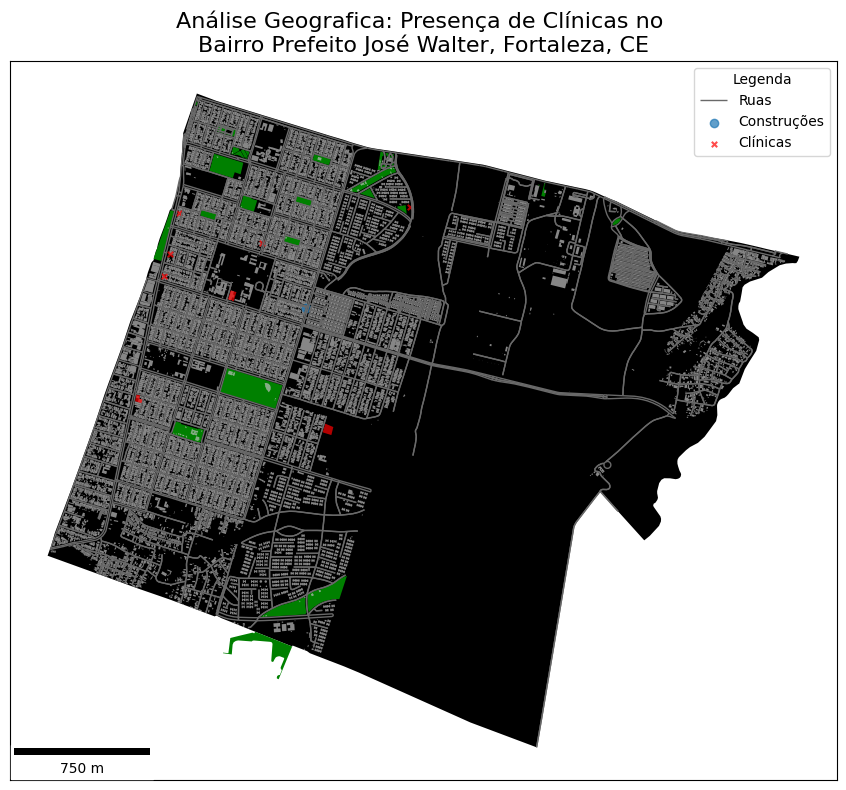

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the footprint
area.plot(ax=ax, facecolor="black",  label="Área Geral")

# Plot the parks
parks.plot(ax=ax, facecolor="green", label="Parques")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray", label="Ruas")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7, label="Construções")

# Plot clinicas
clinic.plot(ax=ax, color="red", alpha=0.7, markersize=15, marker='x', label="Clínicas")

# Add legend
ax.legend(title="Legenda", loc="upper right")

# Add title
ax.set_title("Análise Geografica: Presença de Clínicas no \nBairro Prefeito José Walter, Fortaleza, CE", fontsize=16)

# Add scale bar
area = area.to_crs(epsg=3857)
parks = parks.to_crs(epsg=3857)
edges = edges.to_crs(epsg=3857)
buildings = buildings.to_crs(epsg=3857)
clinic = clinic.to_crs(epsg=3857)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

scalebar = ScaleBar(1, units="m", location="lower left", scale_loc="bottom", length_fraction=0.2)  # 1 unit = 1 meter
ax.add_artist(scalebar)

# Adjust layout
plt.tight_layout()